# Day 17 - Bivariate Statistics: Numeric to Categorical

#### T-test

The purpose of the t-test is to determine whether there is a statistically significant difference between the means of two groups—or, in other words, to determine where there is a difference in the means of a numeric variable for two values of a categorical variable.

In [1]:
### import the bike buyer dataset
import pandas as pd

df = pd.read_csv('data/bikebuyers.csv', 
                usecols=['Purchased Bike', 'Income', 'Education'])
df.head()

,Income,Education,Purchased Bike
0,90000,Bachelors,Yes
1,30000,High School,Yes
2,80000,Partial College,Yes
3,90000,Partial College,Yes
4,70000,Partial College,No


We are testing the hypothesis that higher income levels lead to a greater likelihood of purchasing a bike.

In order to run a t-test, we need to have two lists of data. These are lists of numeric values (the label or y variable)--one for each value of the categorical variable. In other words, we need to create a list of Income values for those who purchased a bike and another list of Income values for those who did not purchase a bike. 

In [2]:
purchased_yes = df[df['Purchased Bike'] == 'Yes']['Income']
purchased_no = df[df['Purchased Bike'] == 'No']['Income']

print(purchased_no.head())

4    70000
5    30000
6    40000
8    40000
9    60000
Name: Income, dtype: int64


Let's examine a visualization of the income separated by whether or not they purchased a bike. Let's also print out the mean values of each list:

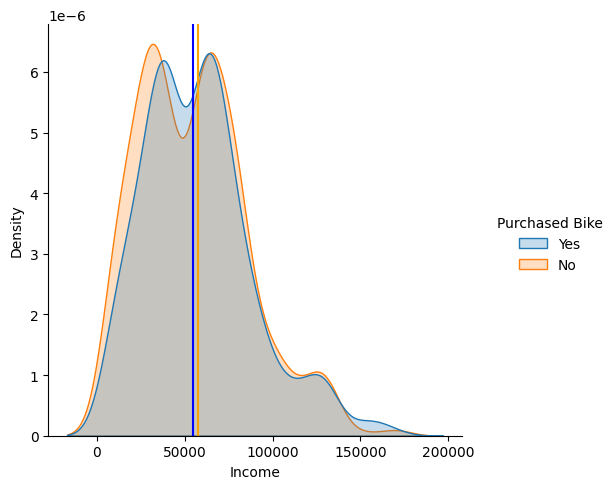

Did purchase bike	$57505.2
Did not purchase bike	$54874.76


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x="Income", hue="Purchased Bike", kind='kde', fill=True)
plt.axvline(x=purchased_yes.mean(), color='orange')
plt.axvline(x=purchased_no.mean(), color='blue')
plt.show()

print(f'Did purchase bike\t${round(purchased_yes.mean(), 2)}')
print(f'Did not purchase bike\t${round(purchased_no.mean(), 2)}')

As you can see, the distributions are very close to each other. However, those who purchased bikes from is do have a slightly higher mean income. However, is that difference statistically significant? That is the role of a t-test and p-value--to tell us if that difference we see in the chart above is meaningful and likely to be repeated in a new sample.

In [4]:
from scipy import stats

stats.ttest_ind(purchased_yes, purchased_no)

TtestResult(statistic=1.3376803853026817, pvalue=0.18130539397879913, df=998.0)

In [5]:
t, p = stats.ttest_ind(purchased_yes, purchased_no)

print(f't-test:\t\t{t}')
print(f'p-value:\t{p}')

t-test:		1.3376803853026817
p-value:	0.18130539397879913


As a reminder, the t-test value represents the effect size, or how strongly related the difference in income is on whether or not a customer purchases a bike. The p-value indicates how likely that t-test result is due to chance. Remember, a p-value lower than 0.05 indicates that the relationship (t-statistic in this case) is very unlikely due to chance.

#### ANOVA

Some categorical features will have three or many more groups (i.e., possible values). We could use a t-test to compare all pairs of groups of that categorical feature against some numeric label. But it makes more sense to use a measure that indicates whether there is a significant difference in means across all of the groups at once. This is the purpose of an analysis of variance (ANOVA)

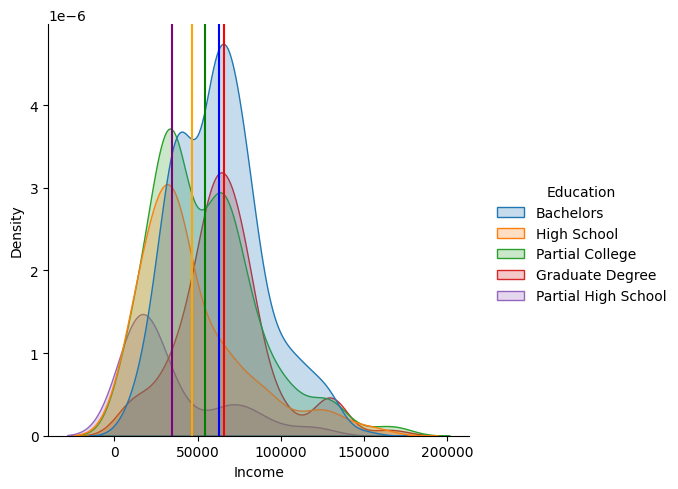

In [7]:
#All packages already imported
#visualize the distribution and the mean.

bachelors = df[df['Education'] == 'Bachelors']['Income']
graduate = df[df['Education'] == 'Graduate Degree']['Income']
highschool = df[df['Education'] == 'High School']['Income']
partialcollege = df[df['Education'] == 'Partial College']['Income']
partialhighschool = df[df['Education'] == 'Partial High School']['Income']

sns.displot(df, x="Income", hue="Education", kind='kde', fill=True)
plt.axvline(x=bachelors.mean(), color='blue')
plt.axvline(x=graduate.mean(), color='red')
plt.axvline(x=highschool.mean(), color='orange')
plt.axvline(x=partialcollege.mean(), color='green')
plt.axvline(x=partialhighschool.mean(), color='purple')
plt.show()


In [8]:
#Run an F-test

f, p = stats.f_oneway(bachelors, graduate, highschool, partialcollege, partialhighschool)

print(f'F-stat: {f}')
print(f'p-value:{p}')

F-stat: 23.472223177586464
p-value:1.4457374425180454e-18


F statistics range from 0 to infinity, and large numbers indicate larger relationships. The p-value is well below 0.05 (notice that there are 17 leading zeros before the 1), indicating that the relationship (or F statistic) is statistically significant. In other words, the level of education achieved is clearly related to how much money someone makes—at least in this dataset.